## 3. Investigation.rsFlag

In this notebook, we want to understand the BMA results in light of the red sequence flag.


###  Dataset

We use the otuput from the algoritgm BMA Stellar Mass (Palmese et al. 2019)

In [7]:
import numpy as np
from astropy.table import Table, vstack, join
from astropy.io.fits import getdata
import scipy.stats as st

import matplotlib.pyplot as plt
import seaborn as sns; sns.set(color_codes=True)

sns.set_style("whitegrid")
sns.set_context('talk',rc={"lines.linewidth": 2.5})

# 'font.sans-serif': ['Arial',
#   'DejaVu Sans',
#   'Liberation Sans',
#   'Bitstream Vera Sans',
#   'sans-serif'],

In [2]:
root = '/home/s1/jesteves/git/bmaCosmoDC2/'

In [16]:
galc= Table(getdata('../data/cosmoDC2_bma_cluster_galaxies.fits'))
galf= Table(getdata('../data/cosmoDC2_bma_field_galaxies.fits'))

galc['field'] = False
galf['field']= True

g0 = vstack([galc,galf])
g0['jid'] = np.arange(len(g0))

In [17]:
rsflag = Table(getdata('../data/matched_table.fits'))

In [18]:
rsflag

<Table length=134667>
Mag_true_g_lsst_z0 Mag_true_i_lsst_z0 ...         decn         jid  
     float32            float32       ...       float64       int64 
------------------ ------------------ ... ------------------- ------
        -22.351065         -23.525345 ...  -25.77676365581047      0
        -20.546082         -21.717037 ...  -25.77128074426682      1
        -21.037712         -22.092745 ...  -25.76577503948369      2
         -21.87688          -22.94467 ... -25.755437627182314      3
        -21.230402          -22.33154 ...  -25.75404026642085      4
         -19.91071         -21.083872 ...  -25.79966249743572      5
        -21.906183         -22.950886 ... -25.717999338060135      6
        -20.489262         -21.629698 ... -25.720104401283024      7
        -22.930986         -24.089695 ... -24.858377701311454      8
        -20.559685          -21.65406 ...  -24.85725001122821      9
               ...                ... ...                 ...    ...
        -20.324404         -21.401903 ... -45.911075190260185 134658
        -20.914309         -21.925814 ... -46.271916008160346 134659
        -20.424707          -21.22597 ...  -46.09084102729878 134660
        -19.936993         -20.926994 ... -46.298855364866895 134661
        -20.074043         -20.883501 ...  -45.92148478208889 134662
        -20.620121         -21.692013 ... -46.351945460519225 134663
        -20.264717         -20.796911 ...  -45.93539438446411 134664
         -21.01925         -21.815773 ...   -46.2782555741167 134665
        -20.617554         -21.185986 ...  -46.09205141494084 134666
        -20.135162         -21.244396 ...  -46.21733904594248 134667

In [32]:
rsflag.remove_columns('stellar_mass')
rsflag.remove_columns('redshift')

In [33]:
gal_all = join(g0,rsflag,keys=['jid'])

In [34]:
gal_all.columns

<TableColumns names=('magerr','magLim','dmag','CID','redshift','mid','R','RA','mag','Mr','z_true','DEC','True','stellar_mass','Pr','Pz','pdfc','pdfm_bkg','zerr','pdfz','Pc','pdfr','Rn','zoffset','pdfm','pdfc_bkg','pdfr_bkg','norm','Pmem','pdf_bkg','Ptaken','pz0','GID_1','pdfz_bkg','pdf','z','mass_weight_age_err','gi_o','index','rabs','gr_o_err','gi_o_err','kri','zmet','best_chisq','mass_err','kii_err','kri_err','ssfr_std','kii','best_model','distmod','best_zmet','mcMass','iobs','taMass','mass_weight_age','iabs','mass','gr_o','ssfr','field','jid','Mag_true_g_lsst_z0','Mag_true_i_lsst_z0','Mag_true_r_sdss_z0','mag_r_sdss','mag_i_sdss','baseDC2/is_on_red_sequence_ri','photoz_mask','galaxy_id','mag_true_i_lsst','mag_true_i_sdss','ra','mag_true_g_lsst','is_central','mag_true_r_lsst','baseDC2/is_on_red_sequence_gr','dec','mag_true_r_sdss','Mag_true_i_sdss_z0','Mag_true_r_lsst_z0','GID_2','ran','decn')>

(array([     0.,      0.,      0.,      0.,      0., 134667.,      0.,
             0.,      0.,      0.]),
 array([-0.5, -0.4, -0.3, -0.2, -0.1,  0. ,  0.1,  0.2,  0.3,  0.4,  0.5]),
 <a list of 10 Patch objects>)

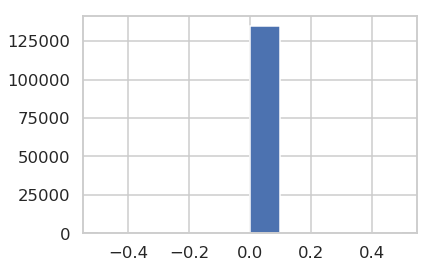

In [21]:
plt.hist(gal_all['RA']-gal_all['ran'])

(array([     0.,      0.,      0.,      0.,      0., 134667.,      0.,
             0.,      0.,      0.]),
 array([-0.5, -0.4, -0.3, -0.2, -0.1,  0. ,  0.1,  0.2,  0.3,  0.4,  0.5]),
 <a list of 10 Patch objects>)

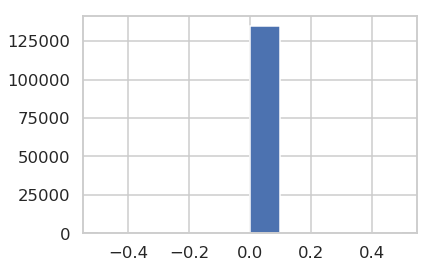

In [22]:
plt.hist(gal_all['DEC']-gal_all['decn'])

In [36]:
field = gal_all['field'] 
nfield= np.logical_not(field)

gal = gal_all[nfield]
galb= gal_all[field]

###  Stellar Mass Validation

In this section we measure the stellar mass accuracy of BMA Stellar Mass.

In [65]:
rs_flag = gal['baseDC2/is_on_red_sequence_ri']
rs_flagb= galb['baseDC2/is_on_red_sequence_ri']

nrs_flag = np.logical_not(rs_flag)
nrs_flagb= np.logical_not(rs_flagb)

In [95]:
def get_residual_variables(data,kind,cut=[None,None]):
    zcls = data['z_true']
    if kind=='mass':
        toto = (data['stellar_mass']/10**data['mass'])
        res  = np.log10(toto)
        xvar = data['stellar_mass']
    else:
        res  = data['Mr']-data['rabs'] 
        xvar = data['Mr']
    xvar = data['stellar_mass']
    mask = np.logical_not(np.isnan(res))
    if cut[0] is not None:
        mask &= data[cut[0]] >= cut[1]
        
    return zcls[mask],res[mask], xvar[mask]

def evolution(data,col,ax=None,s=5,alpha=0.1,title=''):
    if ax is None: ax=plt.axes()
    x = data['z_true']
    y = data[col]
    ax.scatter(x,y,s=s,alpha=alpha)
    ax.set_xlabel(r'$z_{true}$')
    ax.set_title(title)
    
def residual_evolution(data,kind,cut=[None,None],ax=None,s=5,alpha=0.1,title='',label=True):
    if ax is None: ax=plt.axes()
    z,residual,_ = get_residual_variables(data,kind,cut=cut)
    ax.scatter(z,residual,s=s,alpha=alpha)
    if label: ax.set_xlabel(r'$z_{true}$')
    ax.set_title(title)

def residual_logmas(data,kind,cut=[None,None],ax=None,s=5,alpha=0.1,title='',density=False,log=True,color='b'):
    if ax is None: ax=plt.axes()
    zcls,residual,xvar = get_residual_variables(data,kind,cut=cut)
    if density:
        idx = np.argsort(-1*zcls)[::1]
        im = ax.scatter(xvar[idx],residual[idx],s=s,alpha=alpha,c=zcls[idx],cmap='Paired')
        fig.colorbar(im,ax=ax)
    else:
        ax.scatter(xvar,residual,s=s,alpha=alpha)
    ax.set_xlabel(r'Log($M_{\star}^{DC2}/ M_{\odot}$)')
    ax.set_title(title)
    if log: ax.set_xscale('log')

In [38]:
mass_label = r'Log $\left(M_{\star}^{DC2} / M_{\star}^{BMA} \right)$'
mr_label   = r'$M_r^{DC2}/M_r^{BMA}$'
residual_labels = [mass_label,mr_label]

Text(0,0.5,'$M_{\\star}^{DC2}$')

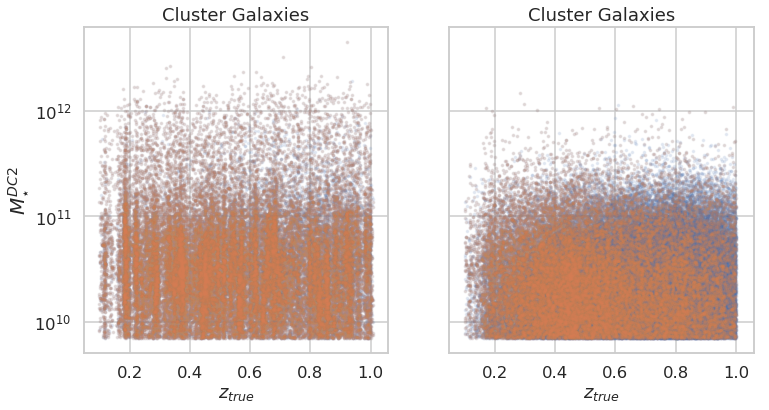

In [46]:
fig, axis = plt.subplots(1, 2, figsize=(12,6), sharex='all',sharey='all')
evolution(gal ,'stellar_mass',ax=axis[0],title='Cluster Galaxies')
evolution(gal[rs_flag] ,'stellar_mass',ax=axis[0],title='Cluster Galaxies')

evolution(galb,'stellar_mass',ax=axis[1],title='Field   Galaxies')
evolution(galb[rs_flagb] ,'stellar_mass',ax=axis[1],title='Cluster Galaxies')

axis[0].set_yscale('log')
axis[0].set_ylabel(r'$M_{\star}^{DC2}$',fontsize=20)
# axis[0].set_xscale('log')
#axis[0].set_ylim(1,-1.)

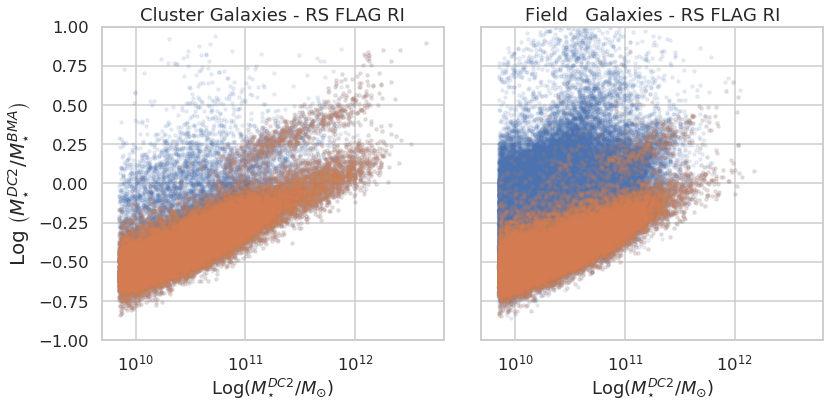

In [64]:
fig, axis = plt.subplots(1, 2, figsize=(12,6), sharex='all',sharey='all')
residual_logmas(gal ,'mass',alpha=0.1,s=10,ax=axis[0],title='Cluster Galaxies')
residual_logmas(gal[rs_flag] ,'mass',alpha=0.1,s=10,ax=axis[0],title='Cluster Galaxies - RS FLAG RI')

residual_logmas(galb,'mass',alpha=0.1,s=10,ax=axis[1],title='Field   Galaxies')
residual_logmas(galb[rs_flagb],'mass',alpha=0.1,s=10,ax=axis[1],title='Field   Galaxies - RS FLAG RI')

axis[0].set_ylabel(residual_labels[0],fontsize=20)
# axis[0].set_xscale('log')
axis[0].set_ylim(-1,1.)
fig.tight_layout()

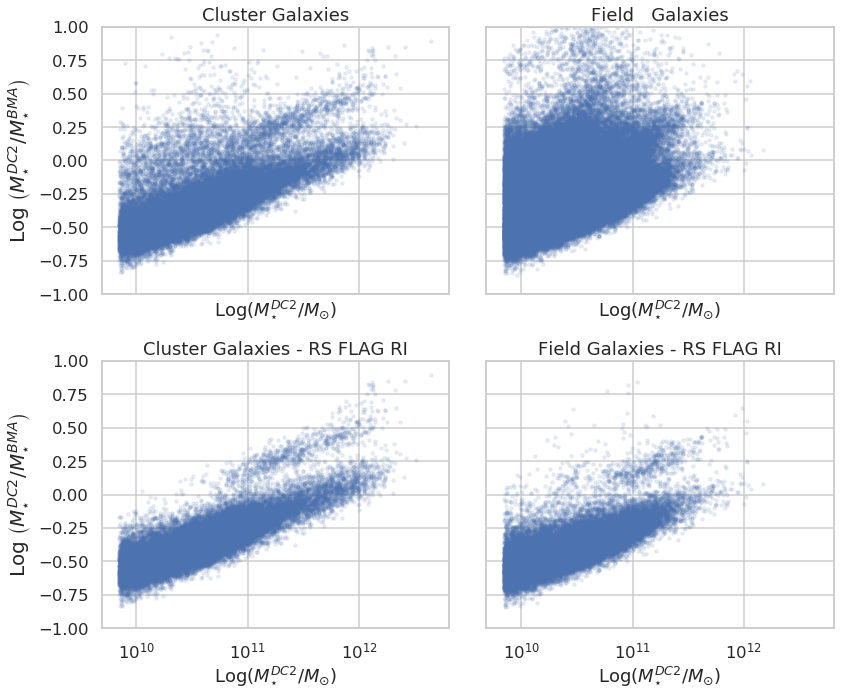

In [59]:
fig, axis = plt.subplots(2, 2, figsize=(12,10), sharex='all',sharey='all')
residual_logmas(gal ,'mass',alpha=0.1,s=10,ax=axis[0,0],title='Cluster Galaxies')
residual_logmas(gal[rs_flag] ,'mass',alpha=0.1,s=10,ax=axis[1,0],title='Cluster Galaxies - RS FLAG RI')

residual_logmas(galb,'mass',alpha=0.1,s=10,ax=axis[0,1],title='Field   Galaxies')
residual_logmas(galb[rs_flagb],'mass',alpha=0.1,s=10,ax=axis[1,1],title='Field Galaxies - RS FLAG RI')

axis[0,0].set_ylabel(residual_labels[0],fontsize=20)
axis[1,0].set_ylabel(residual_labels[0],fontsize=20)
# axis[0,0].set_xscale('log')
axis[0,0].set_ylim(-1,1.)
fig.tight_layout()

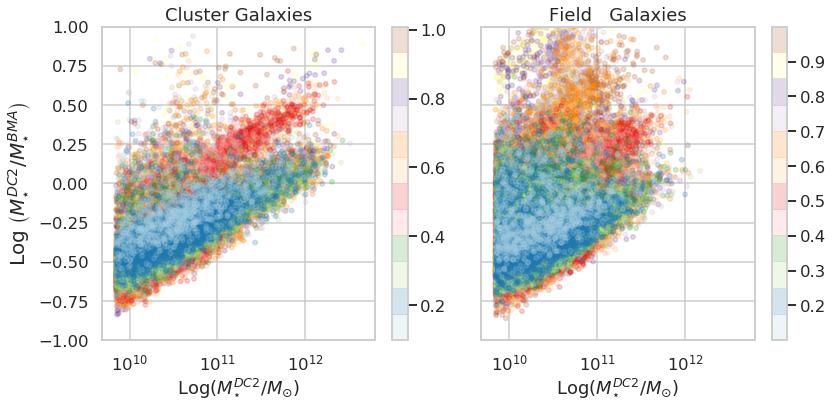

In [41]:
fig, axis = plt.subplots(1, 2, figsize=(12,6), sharex='all',sharey='all')
residual_logmas(gal ,'mass',alpha=0.2,s=20,ax=axis[0],title='Cluster Galaxies',density=True)
residual_logmas(galb,'mass',alpha=0.2,s=20,ax=axis[1],title='Field   Galaxies',density=True)
axis[0].set_ylabel(residual_labels[0],fontsize=20)
# axis[0].set_xscale('log')
axis[0].set_ylim(-1,1.)
fig.tight_layout()
plt.savefig('../graphs/mass_residual_logmass.png')

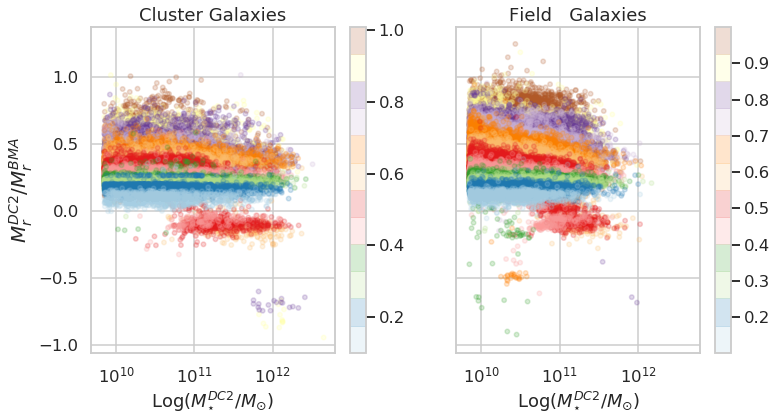

In [73]:
fig, axis = plt.subplots(1, 2, figsize=(12,6), sharex='all',sharey='all')
residual_logmas(gal ,'Mr',alpha=0.2,s=20,ax=axis[0],title='Cluster Galaxies',density=True,log=True)
residual_logmas(galb,'Mr',alpha=0.2,s=20,ax=axis[1],title='Field   Galaxies',density=True,log=True)
axis[0].set_ylabel(residual_labels[1],fontsize=20)
# axis[0].set_xscale('log')
# axis[0].set_ylim(1,-1.)
plt.savefig('../graphs/Mr_residual_logmass.png')

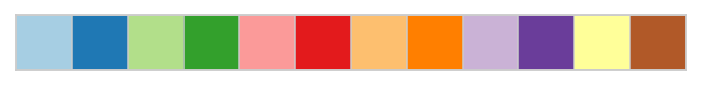

In [33]:
sns.palplot(sns.color_palette("Paired"))

In [34]:
colorGradient = sns.color_palette("Paired")[:]

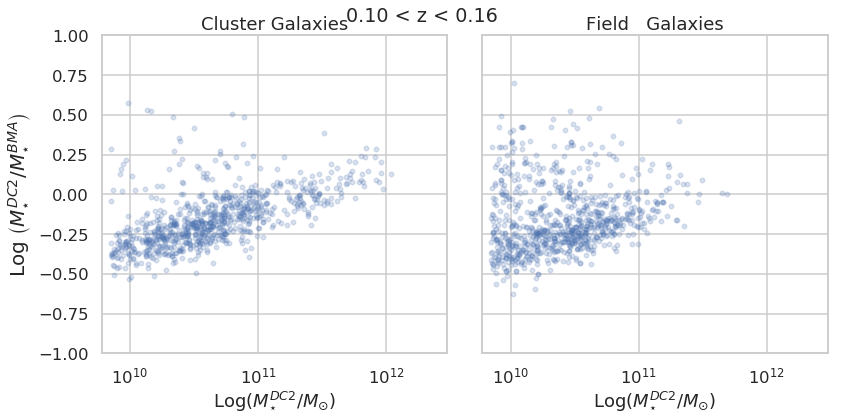

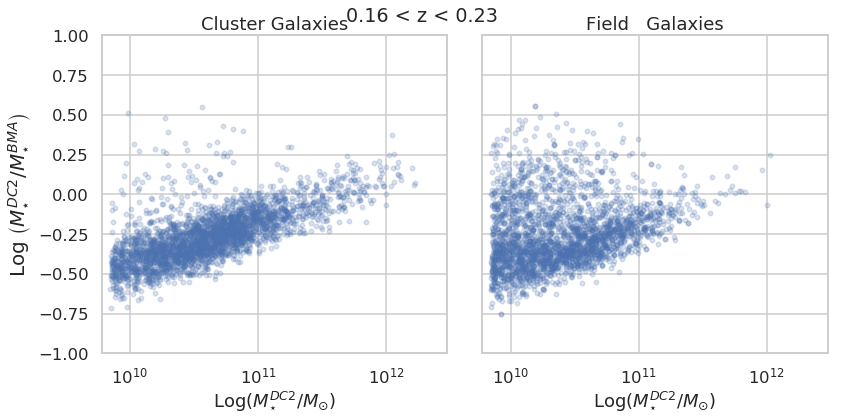

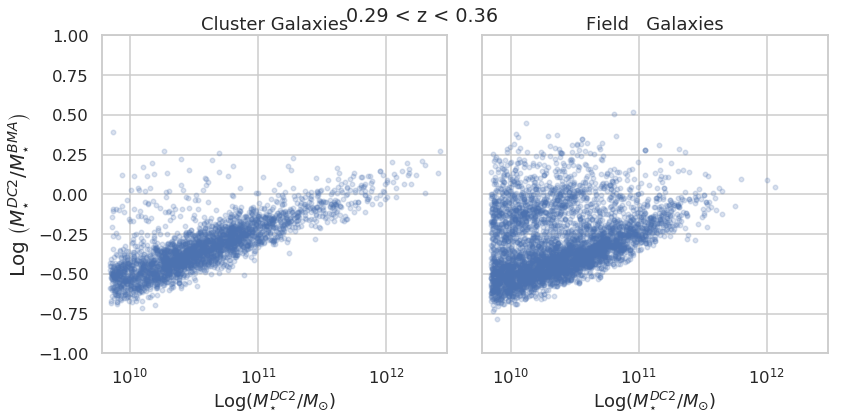

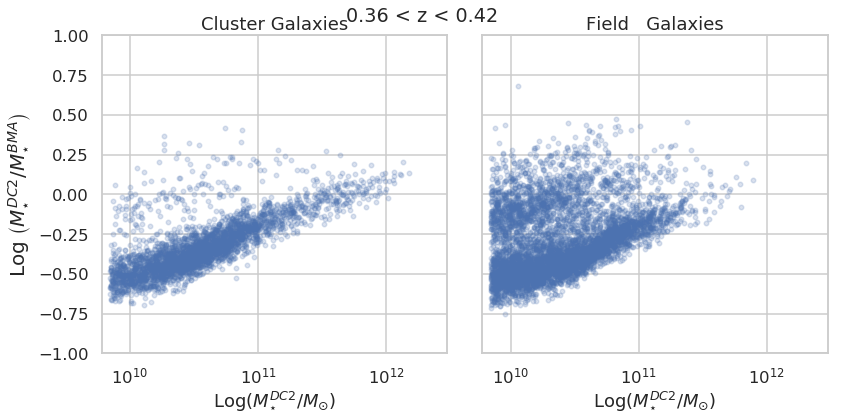

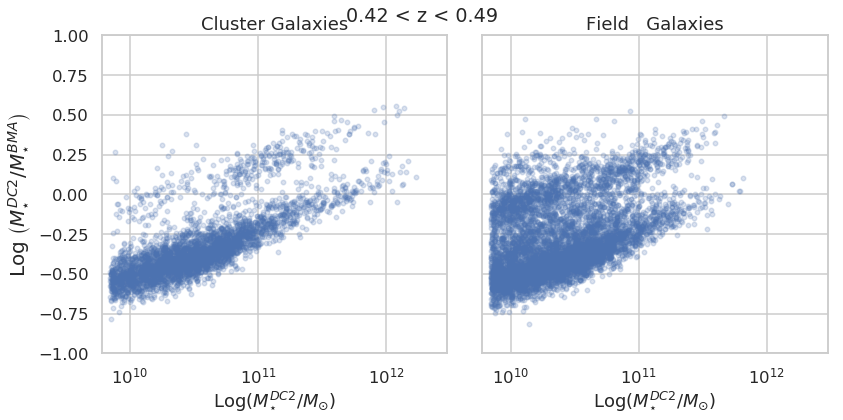

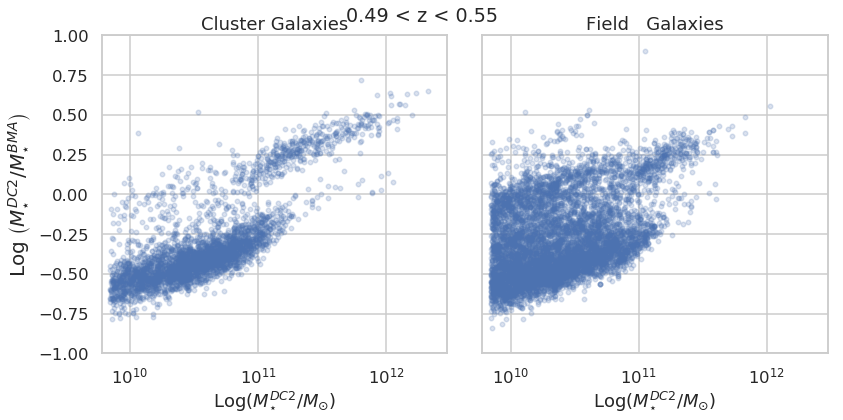

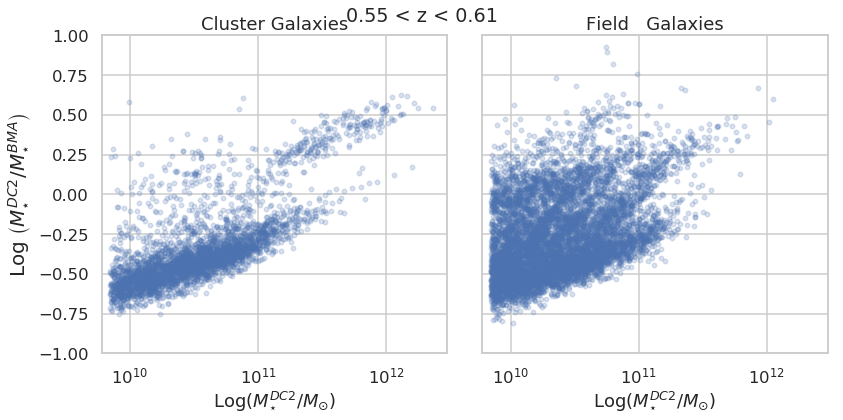

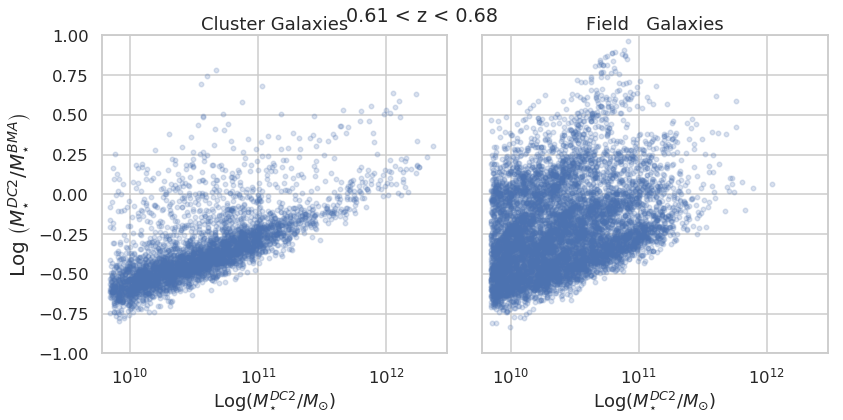

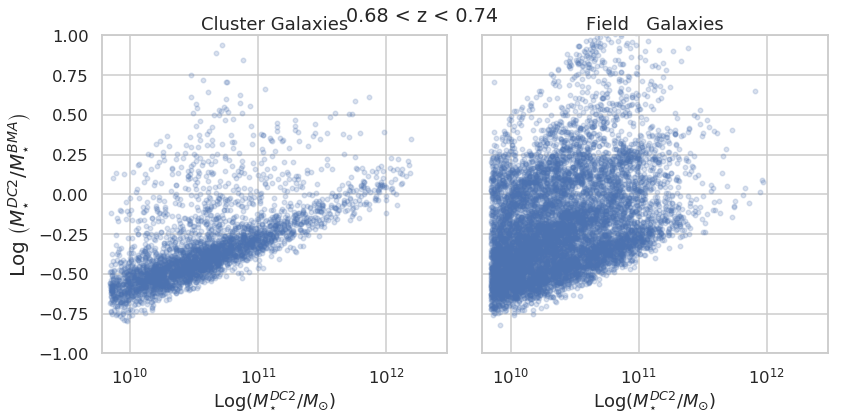

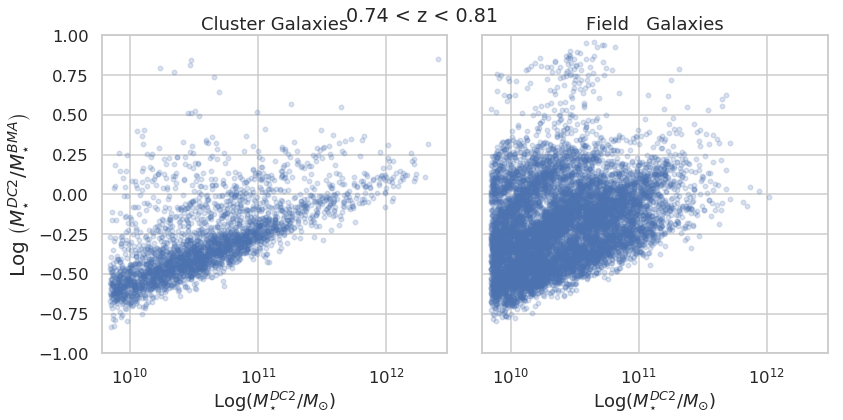

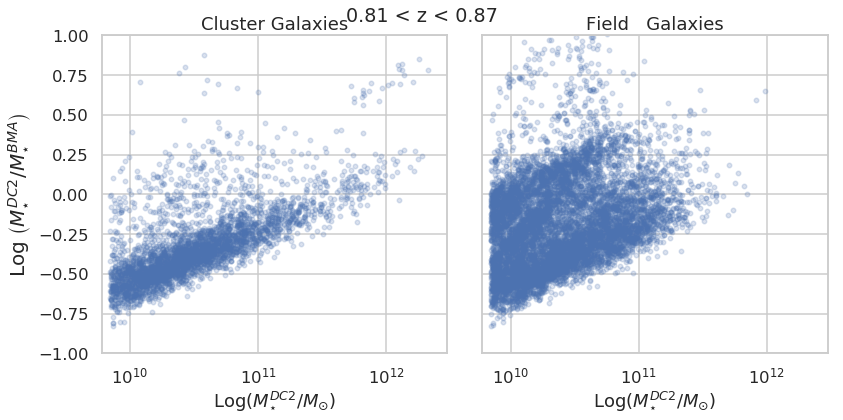

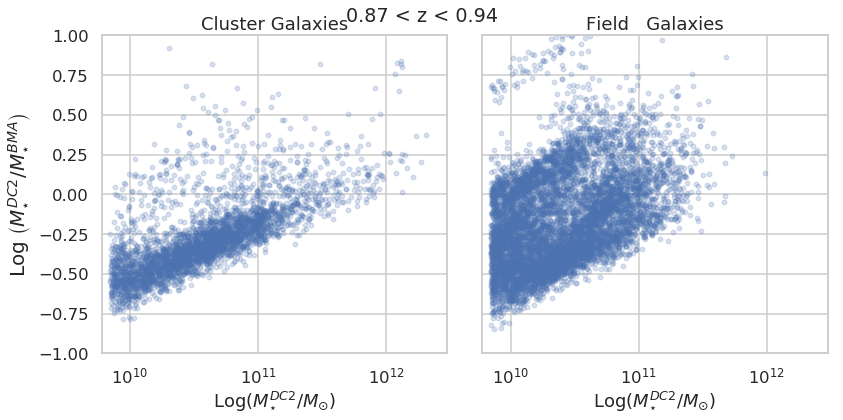

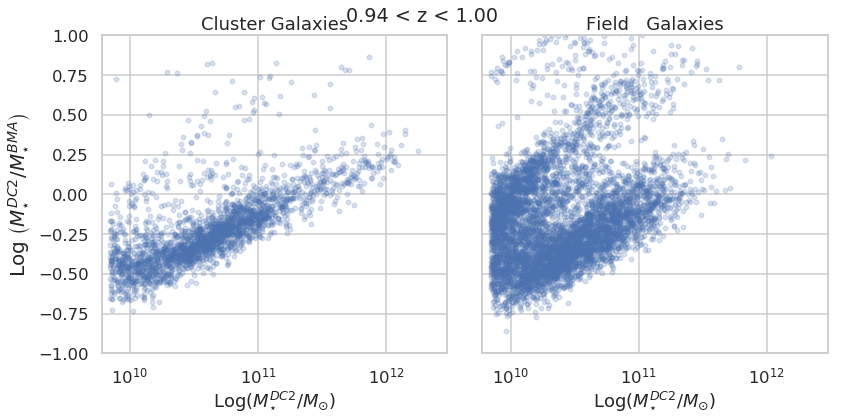

In [35]:
zbins = np.linspace(0.1,1.,15)

for i in range(len(zbins)-1):
    zl,zh = zbins[i],zbins[i+1]
    maska = (gal['z_true']>=zl)&(gal['z_true']<=zh)
    maskb = (galb['z_true']>=zl)&(galb['z_true']<=zh)

    fig, axis = plt.subplots(1, 2, figsize=(12,6), sharex='all',sharey='all')
    residual_logmas(gal[maska] ,'mass',alpha=0.2,s=20,ax=axis[0],title='Cluster Galaxies')
    residual_logmas(galb[maskb],'mass',alpha=0.2,s=20,ax=axis[1],title='Field   Galaxies')
    axis[0].set_ylabel(residual_labels[0],fontsize=20)
    fig.suptitle('%.2f < z < %.2f'%(zl,zh))
    axis[0].set_ylim(-1.,1.)
    axis[0].set_xlim(6e9,3e12)
    fig.tight_layout()
    plt.savefig('../graphs/gif/mass_residual_{:02d}.png'.format(i))
# axis[0].set_xscale('log')


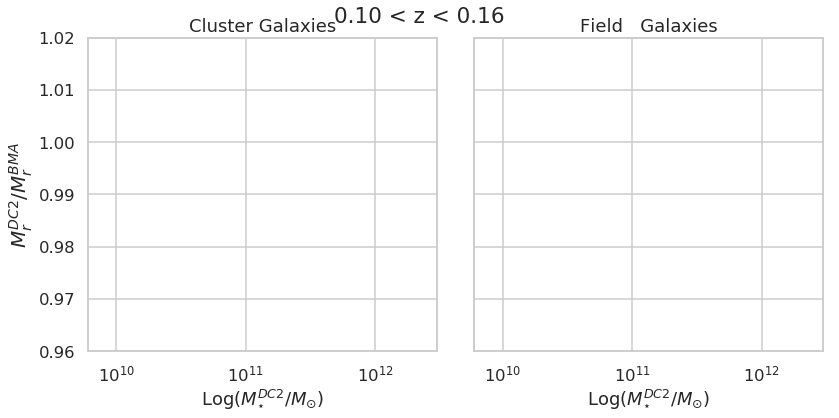

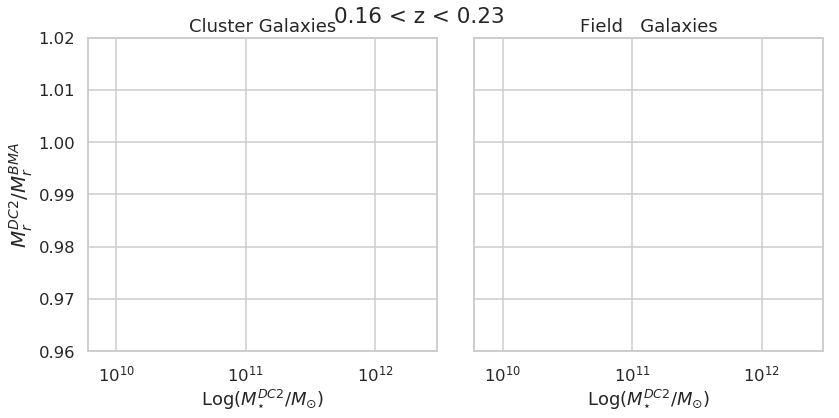

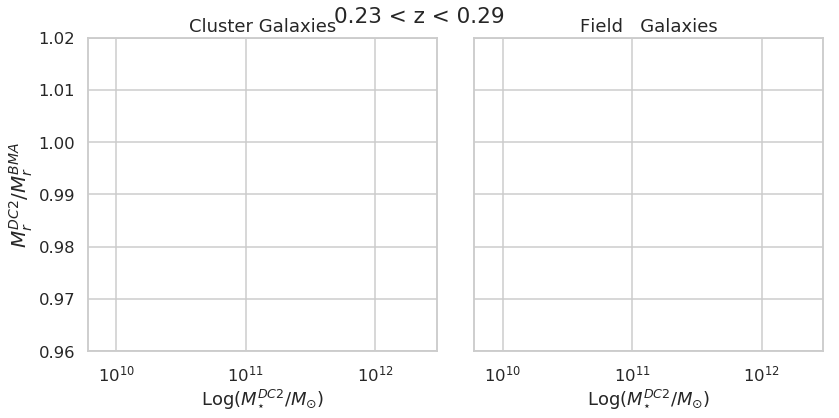

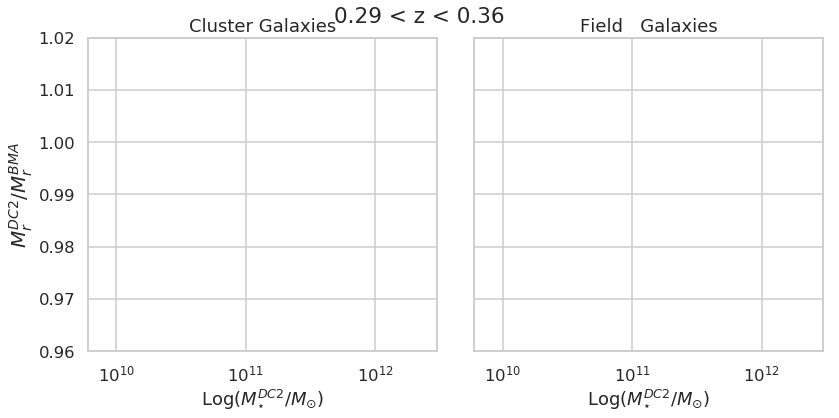

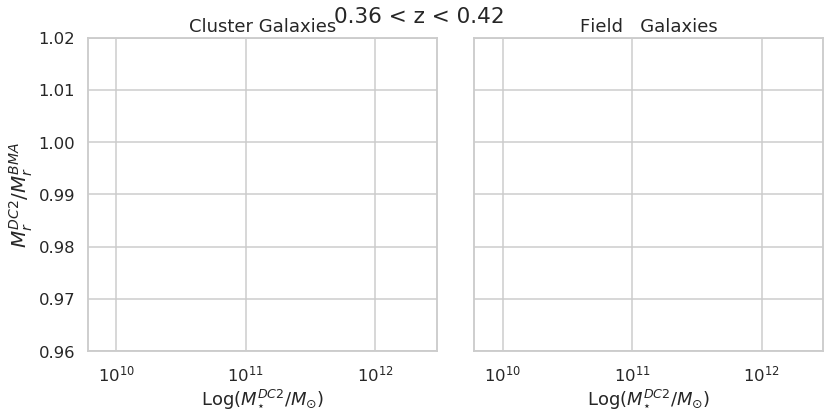

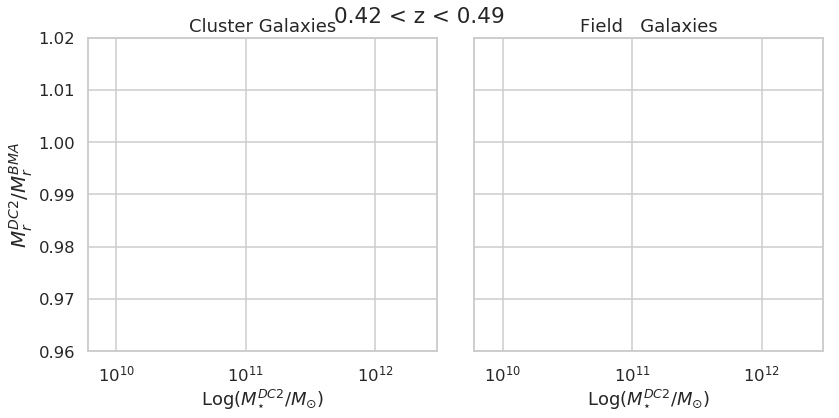

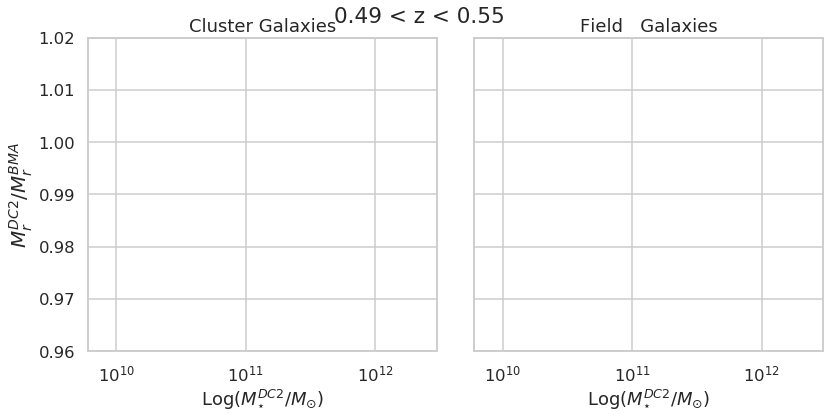

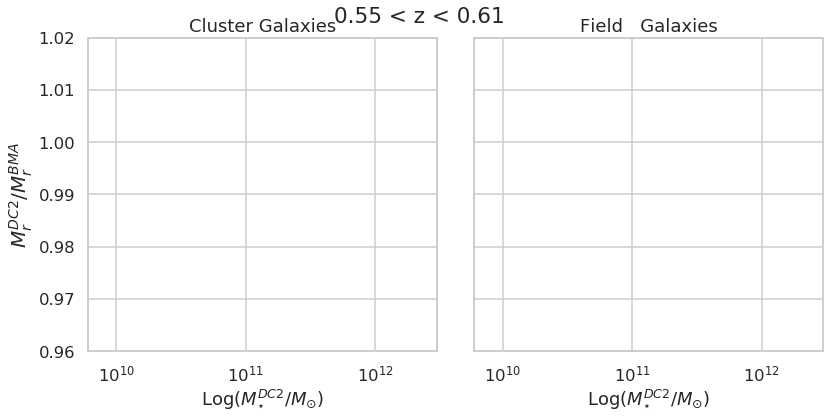

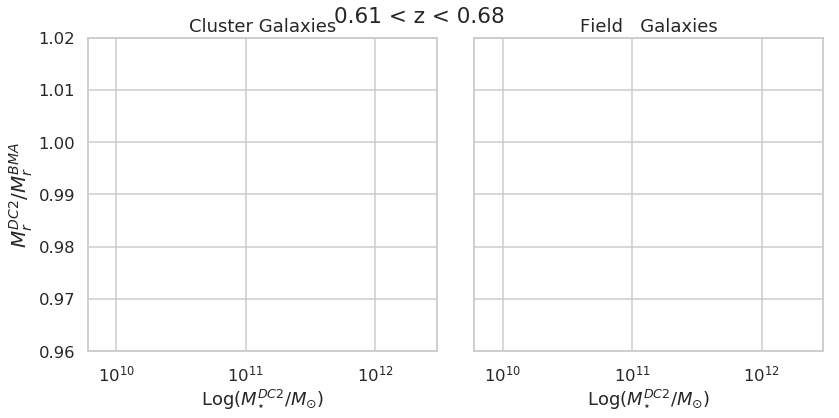

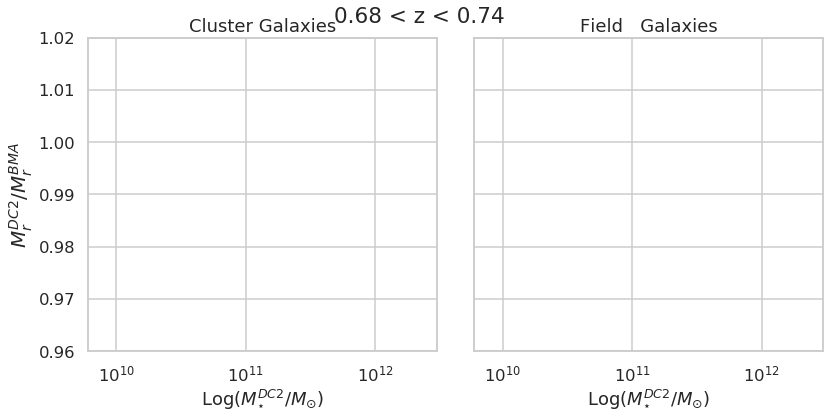

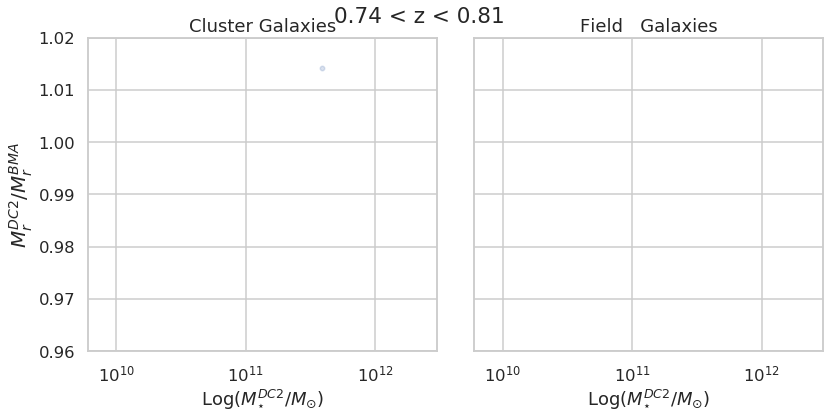

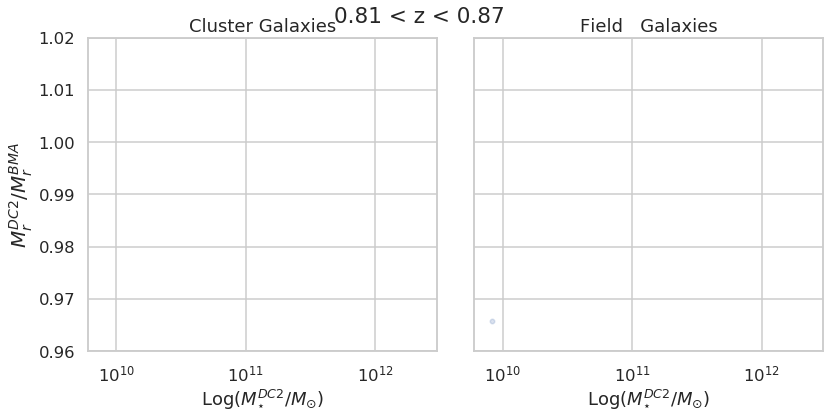

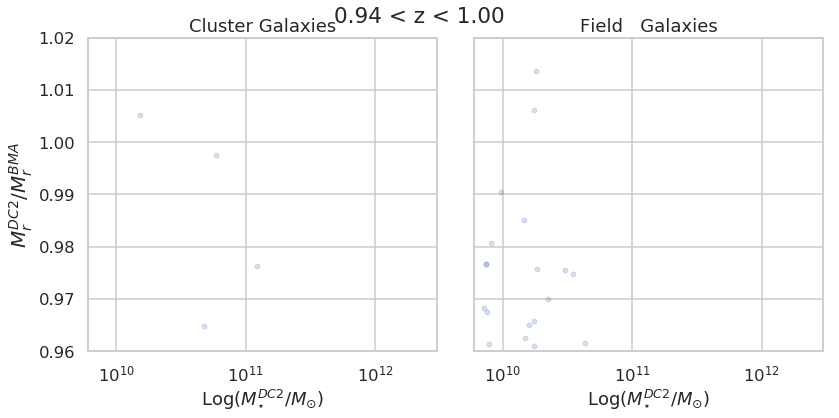

In [74]:
zbins = np.linspace(0.1,1.,15)

for i in range(len(zbins)-1):
    zl,zh = zbins[i],zbins[i+1]
    maska = (gal['z_true']>=zl)&(gal['z_true']<=zh)
    maskb = (galb['z_true']>=zl)&(galb['z_true']<=zh)

    fig, axis = plt.subplots(1, 2, figsize=(12,6), sharex='all',sharey='all')
    residual_logmas(gal[maska] ,'Mr',alpha=0.2,s=20,ax=axis[0],title='Cluster Galaxies')
    residual_logmas(galb[maskb],'Mr',alpha=0.2,s=20,ax=axis[1],title='Field   Galaxies')
    axis[0].set_ylabel(residual_labels[1],fontsize=20)
    fig.suptitle('%.2f < z < %.2f'%(zl,zh))
    axis[0].set_ylim(0.96,1.02)
    axis[0].set_xlim(6e9,3e12)
    fig.tight_layout()
    plt.savefig('../graphs/gif/Mr_residual_{:02d}.png'.format(i))
# axis[0].set_xscale('log')


(1, -1.0)

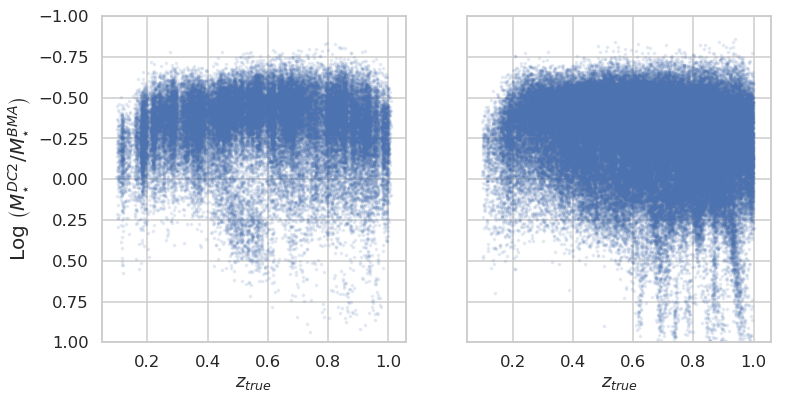

In [37]:
fig, axis = plt.subplots(1, 2, figsize=(12,6), sharex='all',sharey='all')
residual_evolution(gal ,'mass',ax=axis[0])
residual_evolution(galb,'mass',ax=axis[1])
axis[0].set_ylabel(residual_labels[0],fontsize=20)
axis[0].set_ylim(1,-1.)

Text(0,0.5,'Log $\\left(M_{\\star}^{DC2} / M_{\\star}^{BMA} \\right)$')

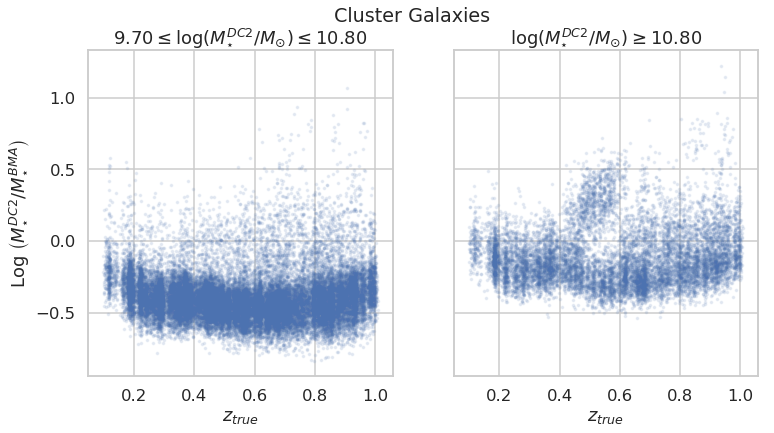

In [38]:
ml,mh = 10**9.7, 10**10.8
mask1 = (gal['stellar_mass']>=ml)&(gal['stellar_mass']<=mh)
mask2 = (gal['stellar_mass']>=mh)


fig, axis = plt.subplots(1, 2, figsize=(12,6), sharex='all',sharey='all')
residual_evolution(gal[mask1],'mass',ax=axis[0],title=r'$ %.2f \leq \log (M_{\star}^{DC2}/M_{\odot}) \leq %.2f$ '%(np.log10(ml),np.log10(mh)))
residual_evolution(gal[mask2],'mass',ax=axis[1],title=r'$ \log (M_{\star}^{DC2}/M_{\odot}) \geq %.2f$'%np.log10(mh))
fig.suptitle('Cluster Galaxies')
axis[0].set_ylabel(residual_labels[0])
# axis[0].set_ylim(1,-1.)

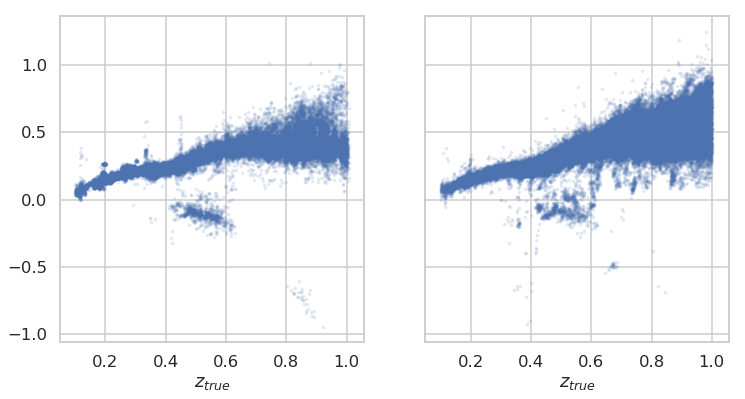

In [96]:
fig, axis = plt.subplots(1, 2, figsize=(12,6), sharex='all',sharey='all')
residual_evolution(gal ,'Mr',ax=axis[0])
residual_evolution(galb,'Mr',ax=axis[1])
# axis[0].set_ylim(1,-1.)

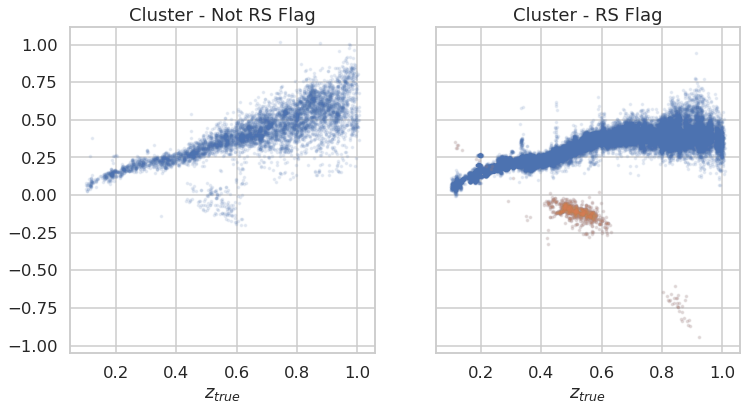

In [99]:
fig, axis = plt.subplots(1, 2, figsize=(12,6), sharex='all',sharey='all')
residual_evolution(gal[nrs_flag] ,'Mr',ax=axis[0],title='Cluster - Not RS Flag')
residual_evolution(gal[rs_flag] ,'Mr',ax=axis[1],title='Cluster - RS Flag')

residual_evolution(gal[rs_flag&kmask] ,'Mr',ax=axis[1],title='Cluster - RS Flag')

#residual_evolution(galb,'Mr',ax=axis[1])
# axis[0].set_ylim(1,-1.)

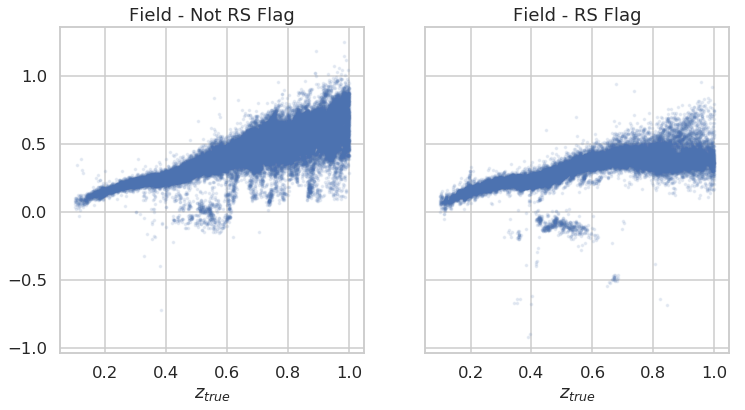

In [98]:
fig, axis = plt.subplots(1, 2, figsize=(12,6), sharex='all',sharey='all')
residual_evolution(galb[nrs_flagb] ,'Mr',ax=axis[0],title='Field - Not RS Flag')
residual_evolution(galb[rs_flagb] ,'Mr',ax=axis[1],title='Field - RS Flag')

#residual_evolution(galb,'Mr',ax=axis[1])
# axis[0].set_ylim(1,-1.)

Text(0,0.5,'k-corr: kii')

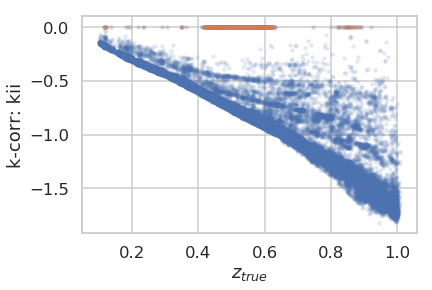

In [101]:
kmask = gal['kii']==0
plt.scatter(gal['z_true'],gal['kii'],s=10,alpha=0.1)
plt.scatter(gal['z_true'][kmask],gal['kii'][kmask],s=10,alpha=0.1)
plt.xlabel(r'$z_{true}$')
plt.ylabel(r'k-corr: kii')

Text(0.5,0,'$z_{true}$')

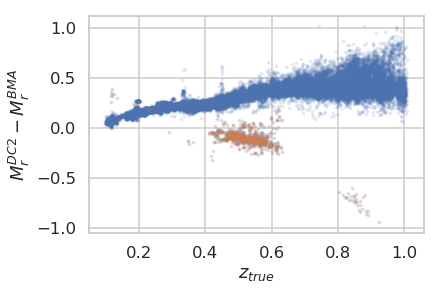

In [105]:
residual_evolution(gal ,'Mr')
residual_evolution(gal[kmask] ,'Mr')
plt.ylabel(r'$M_r^{DC2}-M_r^{BMA}$')
plt.xlabel(r'$z_{true}$')

In [40]:
ml,mh = 10**9.7, 10**10.8
mask1 = (gal['stellar_mass']>=ml)&(gal['stellar_mass']<=mh)
mask2 = (gal['stellar_mass']>=mh)


fig, axis = plt.subplots(1, 2, figsize=(12,6), sharex='all',sharey='all')
residual_evolution(gal[mask1],'Mr',ax=axis[0],title=r'$ %.2f \leq \log (M_{\star}^{DC2}/M_{\odot}) \leq %.2f$ '%(np.log10(ml),np.log10(mh)))
residual_evolution(gal[mask2],'Mr',ax=axis[1],title=r'$ \log (M_{\star}^{DC2}/M_{\odot}) \geq %.2f$'%np.log10(mh))
fig.suptitle('Cluster Galaxies')
axis[0].set_ylabel(residual_labels[1])
fig.tight_layout()
plt.savefig('../graphs/residual_Mr_evolution.png')
# axis[0].set_ylim(1,-1.)

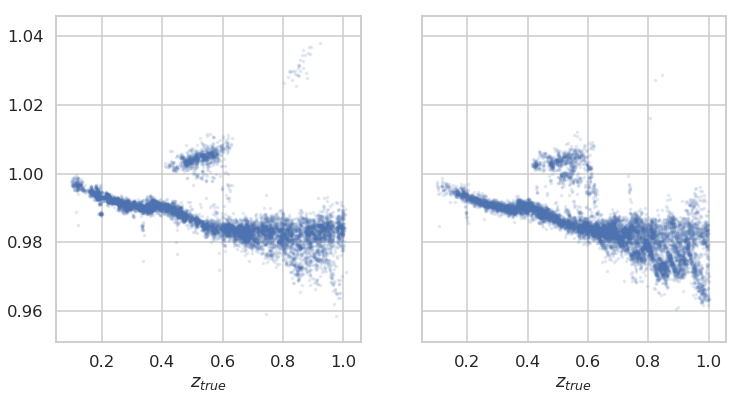

In [41]:
ml,mh = 10**10.9, 10**14
maska = (gal['stellar_mass']>=ml)&(gal['stellar_mass']<=mh)
maskb = (galb['stellar_mass']>=ml)&(galb['stellar_mass']<=mh)

fig, axis = plt.subplots(1, 2, figsize=(12,6), sharex='all',sharey='all')
residual_evolution(gal[maska],'Mr',ax=axis[0])
residual_evolution(galb[maskb],'Mr',ax=axis[1])
# axis[0].set_ylim(1,-1.)

###  Select the second population

In this lines we will classify the distribution in two populations: A and B

In [42]:
def get_labels(data):
    z,residual,mass = get_residual_variables(data,'Mr')
    mask = (residual > 1.)&(z>0.4)&(z<0.7)
    return mask

In [43]:
pop = get_labels(gal)
npop= np.logical_not(pop)

In [44]:
popb = get_labels(galb)
npopb= np.logical_not(popb)

In [45]:
mh = 10**(10.8)
mask2 = (gal['stellar_mass']>=mh)
mask2b= (galb['stellar_mass']>=mh)

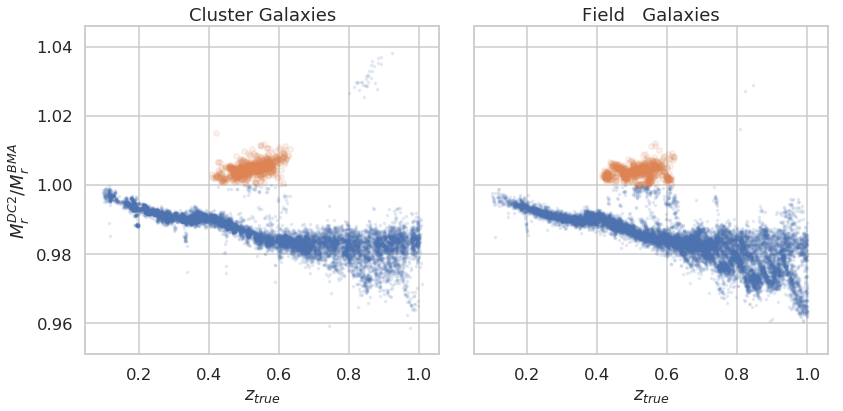

In [46]:
fig, axis = plt.subplots(1, 2, figsize=(12,6), sharex='all',sharey='all')
residual_evolution(gal[mask2&(npop)],'Mr',ax=axis[0])
residual_evolution(gal[mask2&(pop )],'Mr',s=30,ax=axis[0],title='Cluster Galaxies')

residual_evolution(galb[mask2b&(npopb)],'Mr',ax=axis[1])
residual_evolution(galb[mask2b&(popb)],'Mr',s=30,ax=axis[1],title='Field   Galaxies')
axis[0].set_ylabel(residual_labels[1])
fig.tight_layout()

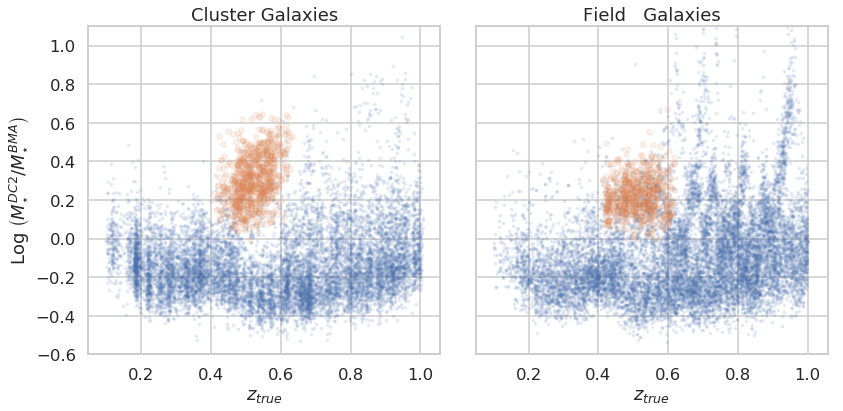

In [52]:
fig, axis = plt.subplots(1, 2, figsize=(12,6), sharex='all',sharey='all')
residual_evolution(gal[mask2&(npop)],'mass',ax=axis[0])
residual_evolution(gal[mask2&(pop )],'mass',s=30,ax=axis[0],title='Cluster Galaxies')

residual_evolution(galb[mask2b&(npopb)],'mass',ax=axis[1])
residual_evolution(galb[mask2b&(popb)],'mass',s=30,ax=axis[1],title='Field   Galaxies')
axis[0].set_ylim(-0.6,1.1)
axis[0].set_ylabel(residual_labels[0])
fig.tight_layout()

In [48]:
### plot color

### Looking for Correlations

On color, radial, 

In [57]:
def calculcate_color_column(data):
    labels = ['g-r','r-i','i-z']
    for i in range(3):
        data[labels[i]] = data['mag'][:,i]-data['mag'][:,i+1]
    return data

In [58]:
gal = calculcate_color_column(gal)
galb= calculcate_color_column(galb)

In [59]:
## DES Y3 redMaPPer
redSequence_file = '/home/s1/jesteves/backup/Memb-assign/aux-table/redSequence_Fit_redmapper_z_binned_Pmem_cut.txt'
rs = np.genfromtxt(redSequence_file)

# z,gr_mean,gr_0,gr_slope, ri_mean, ri_0, ri_slope, iz_mean, ...

#### Color Distribution

In [65]:
def color_evolution(data,lcol,s=10,alpha=0.1,ax=None,title=''):
    if ax is None: ax = plt.axes()
    color = data[lcol]
    zcls  = data['z_true'][:]
    ax.scatter(zcls,color,s=s,alpha=alpha,label='_')
    ax.set_title(title)
    ax.set_xlabel(r'$z_{true}$')

def color_mag(data,lcol,ix=1,s=30,alpha=0.3,ax=None,title='',zlims=[0.,1]):
    zl,zh = zlims
    mag   = data['mag'][:,ix]
    color = data[lcol]
    zcls  = data['z_true'][:]
    mask  = (zcls<=zh)&(zcls>=zl)
    ax.scatter(mag[mask],color[mask],s=s,alpha=alpha,label='_')
    ax.set_title(title)


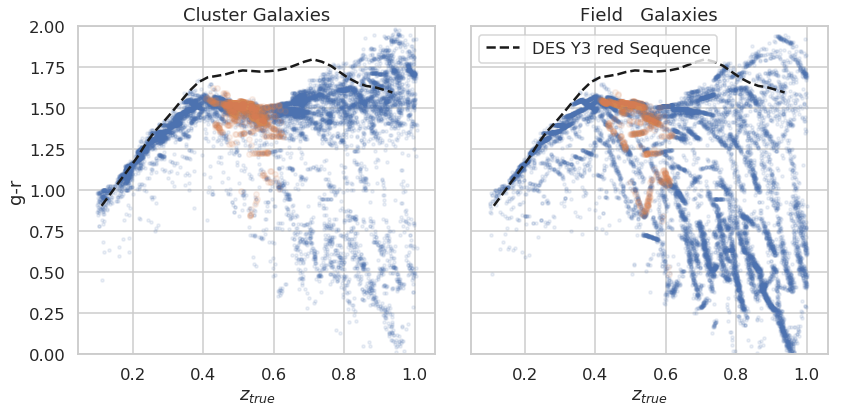

In [66]:
fig, axis = plt.subplots(1, 2, figsize=(12,6), sharex='all',sharey='all')

color_evolution(gal[mask2&(npop)],'g-r',ax=axis[0])
color_evolution(gal[mask2&(pop )],'g-r',s=30,ax=axis[0],title='Cluster Galaxies')
axis[0].plot(rs[:,0],rs[:,1],'k--')

color_evolution(galb[mask2b&(npopb)],'g-r',ax=axis[1])
color_evolution(galb[mask2b&(popb)],'g-r',s=30,ax=axis[1],title='Field   Galaxies')
axis[1].plot(rs[:,0],rs[:,1],'k--',label='DES Y3 red sequence')

axis[0].set_ylabel('g-r')
axis[0].set_ylim(0.,2.)
axis[1].legend()
fig.tight_layout()

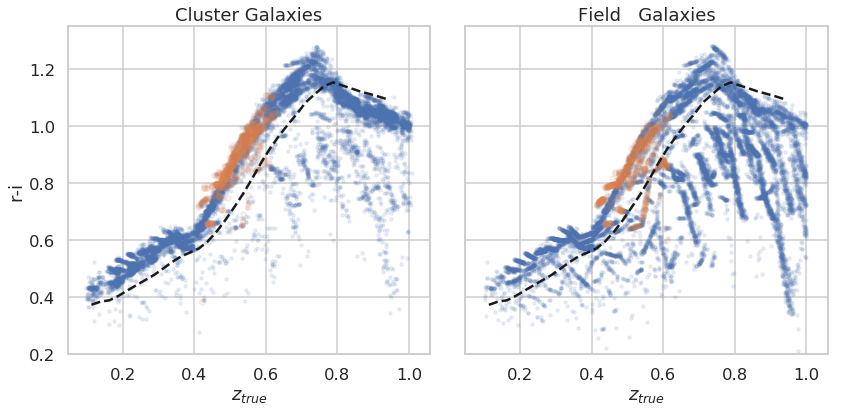

In [69]:
fig, axis = plt.subplots(1, 2, figsize=(12,6), sharex='all',sharey='all')

color_evolution(gal[mask2&(npop)],'r-i',ax=axis[0])
color_evolution(gal[mask2&(pop )],'r-i',s=30,ax=axis[0],title='Cluster Galaxies')
axis[0].plot(rs[:,0],rs[:,4],'k--')


color_evolution(galb[mask2b&(npopb)],'r-i',ax=axis[1])
color_evolution(galb[mask2b&(popb)],'r-i',s=30,ax=axis[1],title='Field   Galaxies')
axis[1].plot(rs[:,0],rs[:,4],'k--',label='DES Y3 red sequence')
axis[0].set_ylabel('r-i')
axis[0].set_ylim(0.2,1.35)
fig.tight_layout()

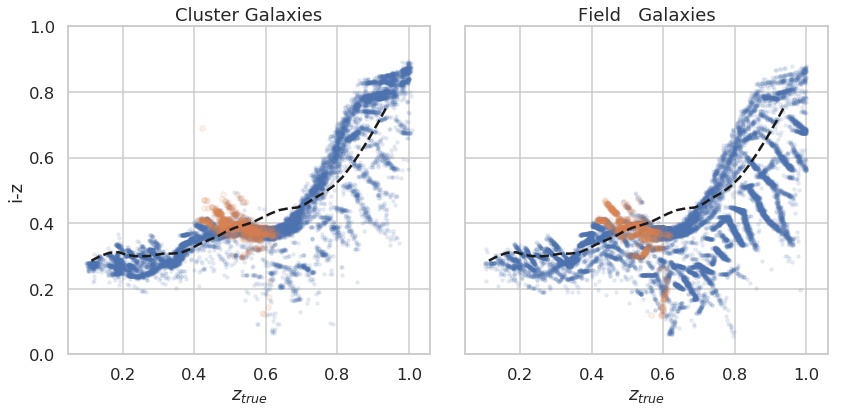

In [163]:
fig, axis = plt.subplots(1, 2, figsize=(12,6), sharex='all',sharey='all')

color_evolution(gal[mask2&(npop)],'i-z',ax=axis[0])
color_evolution(gal[mask2&(pop )],'i-z',s=30,ax=axis[0],title='Cluster Galaxies')
axis[0].plot(rs[:,0],rs[:,7],'k--')

color_evolution(galb[mask2b&(npopb)],'i-z',ax=axis[1])
color_evolution(galb[mask2b&(popb)],'i-z',s=30,ax=axis[1],title='Field   Galaxies')
axis[1].plot(rs[:,0],rs[:,7],'k--')

axis[1].set_ylim(0.,1.)
axis[0].set_ylabel('i-z')
fig.tight_layout()

In [75]:
zbins = np.linspace(0.4,0.63,11)

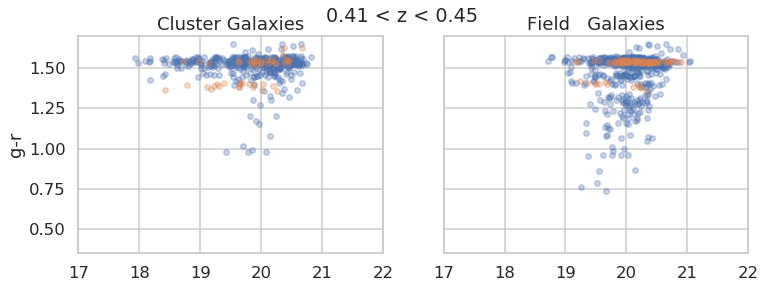

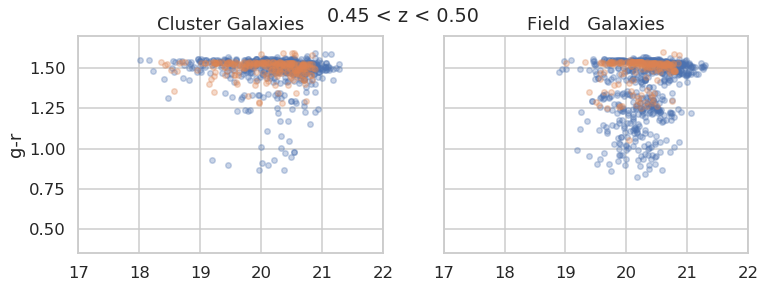

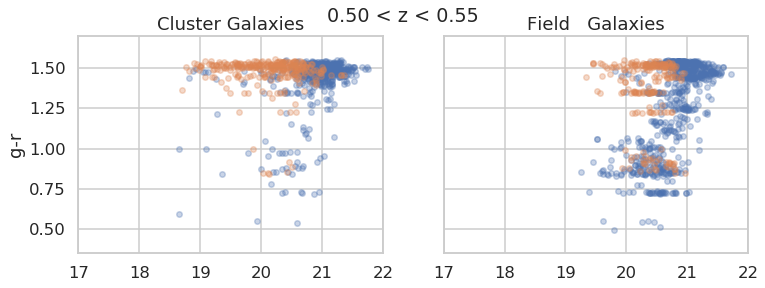

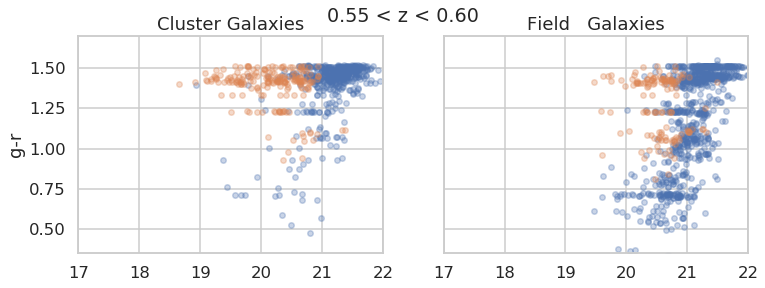

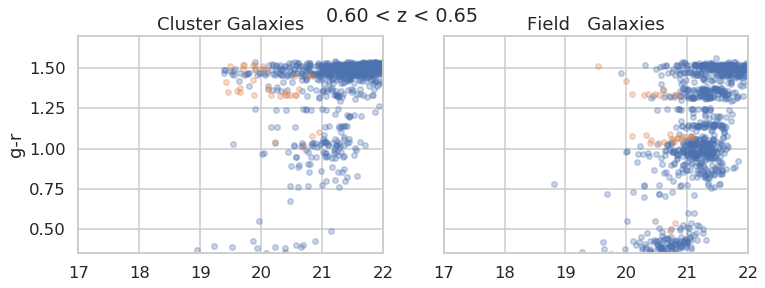

In [71]:
for i in range(len(zbins)-1):
    zl,zh = zbins[i],zbins[i+1]
    fig, axis = plt.subplots(1, 2, figsize=(12,4), sharex='all',sharey='all')

    color_mag(gal[mask2&(npop)],'g-r',ax=axis[0],zlims=[zl,zh])
    color_mag(gal[mask2&(pop )],'g-r',s=30,ax=axis[0],title='Cluster Galaxies',zlims=[zl,zh])

    color_mag(galb[mask2b&(npopb)],'g-r',ix=1,ax=axis[1],zlims=[zl,zh])
    color_mag(galb[mask2b&(popb)],'g-r',ix=1,s=30,ax=axis[1],title='Field   Galaxies',zlims=[zl,zh])
    axis[0].set_ylabel('g-r')
    axis[0].set_xlim(17,22)
    axis[0].set_ylim(0.35,1.7)
    
    fig.suptitle('%.2f < z < %.2f'%(zl,zh))

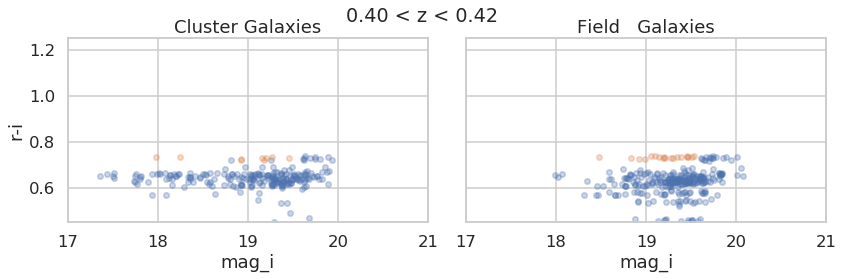

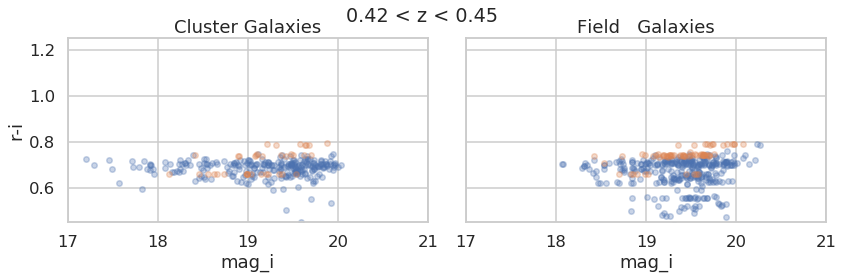

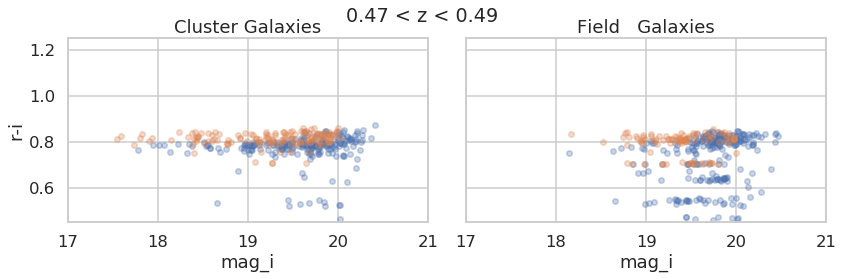

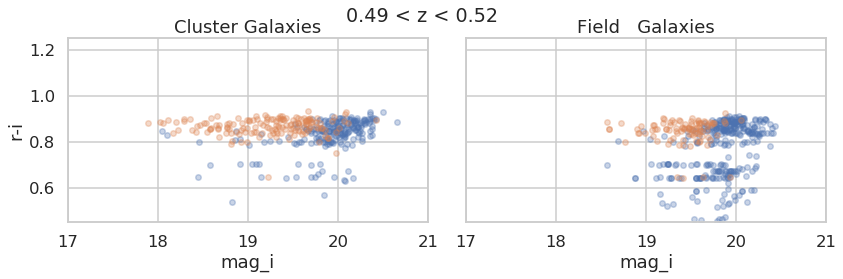

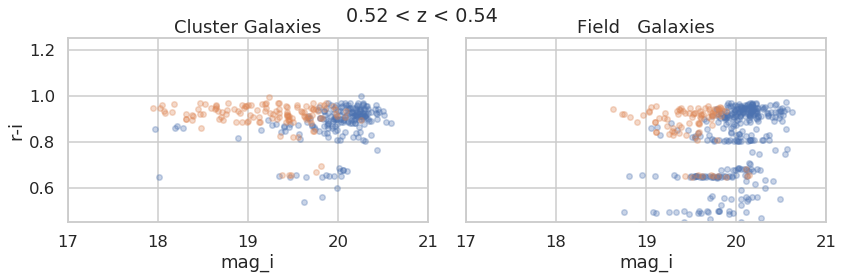

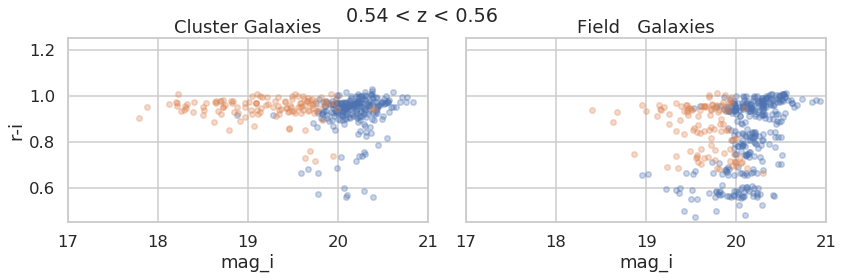

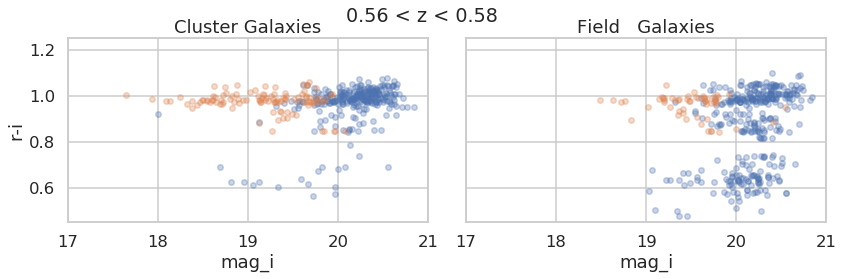

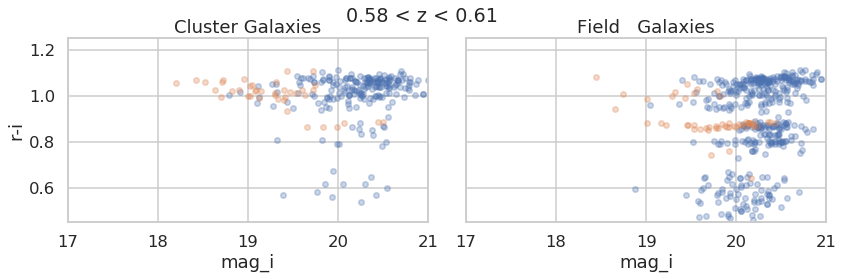

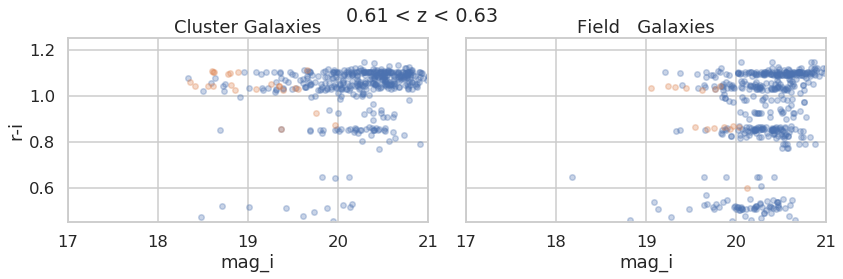

In [77]:
for i in range(len(zbins)-1):
    zl,zh = zbins[i],zbins[i+1]
    fig, axis = plt.subplots(1, 2, figsize=(12,4), sharex='all',sharey='all')

    color_mag(gal[mask2&(npop)],'r-i',ix=2,ax=axis[0],zlims=[zl,zh])
    color_mag(gal[mask2&(pop )],'r-i',ix=2,s=30,ax=axis[0],title='Cluster Galaxies',zlims=[zl,zh])

    color_mag(galb[mask2b&(npopb)],'r-i',ix=2,ax=axis[1],zlims=[zl,zh])
    color_mag(galb[mask2b&(popb)],'r-i',ix=2,s=30,ax=axis[1],title='Field   Galaxies',zlims=[zl,zh])
    axis[0].set_ylabel('r-i')
    axis[0].set_xlabel('mag_i')
    axis[1].set_xlabel('mag_i')
    axis[0].set_xlim(17,21)
    axis[0].set_ylim(0.45,1.25)
    
    fig.suptitle('%.2f < z < %.2f'%(zl,zh))
    fig.tight_layout()
    plt.savefig('../graphs/gif/color_mag_ri_{:02d}.png'.format(i))

#### Spatial Distribution

In [78]:
radii = gal['R']*0.7
radiib= galb['R']*0.7

Text(0.5,0,'R [Mpc]')

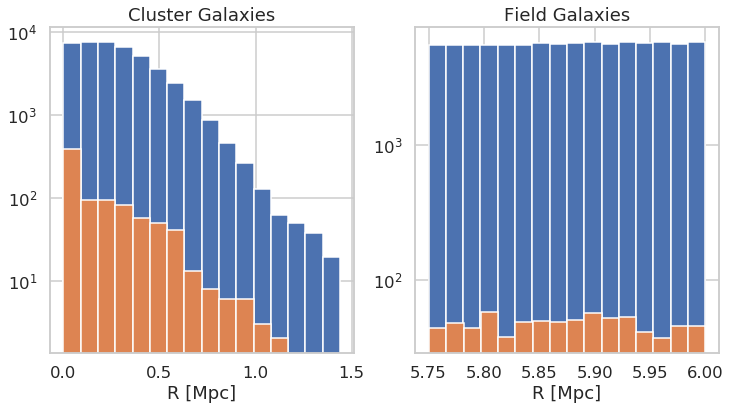

In [97]:
fig, axis = plt.subplots(1, 2, figsize=(12,6))

a = axis[0].hist(radii[npop],bins=16,density=False)
axis[0].hist(radii[pop],bins=a[1],density=False)
axis[0].set_yscale('log')
axis[0].set_title('Cluster Galaxies')
axis[0].set_xlabel('R [Mpc]')

axis[1].hist(radiib[npopb],bins=16,density=False)
axis[1].hist(radiib[popb] ,bins=16,density=False)
axis[1].set_yscale('log')
axis[1].set_title('Field Galaxies')
axis[1].set_xlabel('R [Mpc]')

In [81]:
1.*np.count_nonzero(radii[pop]<0.1)/np.count_nonzero(pop)

0.4710059171597633

In [90]:
ra, dec = gal['RA'],gal['DEC']
rab,decb= galb['RA'],galb['DEC']

Text(0,0.5,'DEC')

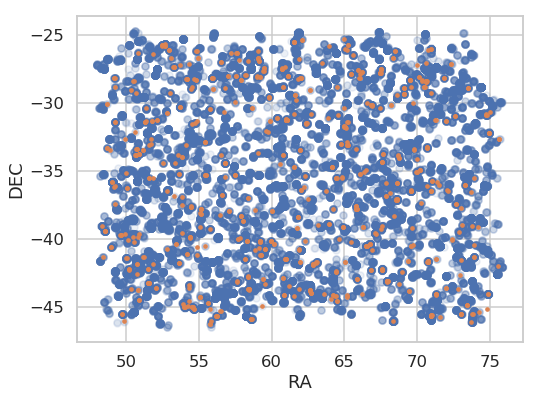

In [96]:
plt.figure(figsize=(8,6))
plt.scatter(ra[npop],dec[npop],s=50,alpha=0.1)
plt.scatter(ra[pop],dec[pop],s=10)

plt.xlabel('RA')
plt.ylabel('DEC')

### Looking for Correlations with Halos

In [99]:
def compute_nbad(keys):
    res = np.array([idx.size for idx in keys])
    return res

def chunks(ids1, ids2):
    """Yield successive n-sized chunks from data"""
    for id in ids2:
        w, = np.where( ids1==id )
        yield w

In [140]:
zcls = cat['redshift']
w = (zcls>0.45)&(zcls<0.6)

In [146]:
cids  = cat['CID']
keys = list(chunks(gal['CID'][mask2&pop],cids))
keys2= list(chunks(gal['CID'][mask2],cids))

In [159]:
nbad = compute_nbad(keys)
ngals= compute_nbad(keys2)
fraction = 1.*nbad/ngals

In [148]:
ntrue = cat['Ngals_true']
m200  = cat['M200_true']

Text(0.5,0,'$f_{pop}$ per halo')

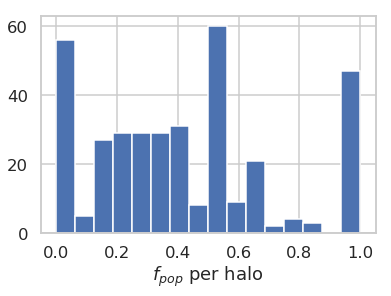

In [155]:
plt.hist(1.*nbad[w]/ngals[w],bins=16)
plt.xlabel(r'$f_{pop}$ per halo')
# plt.yscale('log')

Text(0,0.5,'$N_{pop}$')

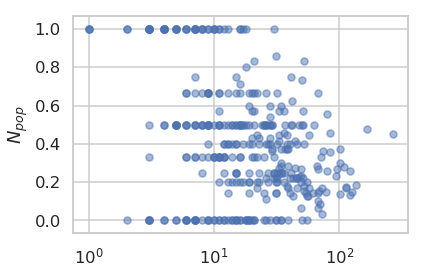

In [162]:
plt.scatter(ntrue[w],fraction[w],alpha=0.5,s=50)
plt.xscale('log')
# plt.yscale('log')
# plt.ylim(0.5,)
plt.ylabel(r'$N_{pop}$')
# plt.xlabel('halo_mass')

In [182]:
ra,dec = cat['RA'],cat['DEC']

In [179]:
mask = (nbad==0)&(np.abs(cat['redshift']-0.50)<=0.10)

In [180]:
def plot_sky(ra,dec):
    plt.scatter(ra,dec)


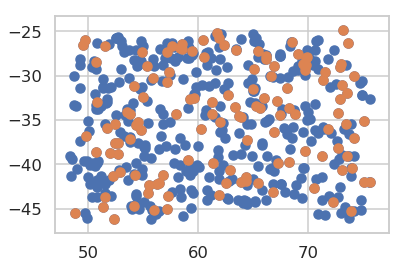

In [183]:
plot_sky(ra[w],dec[w])
plot_sky(ra[mask],dec[mask])

In [ ]:
def makeBins(variable,xedges):
    nsize=len(xedges)-1
    xbins = (xedges[1:]+xedges[:-1])/2
    indices = [ np.where((variable >= xedges[i]) & (variable < xedges[i + 1]))[0] for i in range(nsize)]
    return indices, xbins


In [413]:
def mass_scatter_residual(x1,x2,x3,zlabel='$z_{cls}$'):
    cut = remove_nan(x2)
    x = np.log10(x2[cut]/x1[cut])
    
    idx = np.flip(np.argsort(x3))
    plt.scatter(np.log10(x1)[idx],x[idx],c=x3[idx],cmap='RdBu',s=5,alpha=0.8)
    cbar = plt.colorbar()
    cbar.set_label(zlabel)

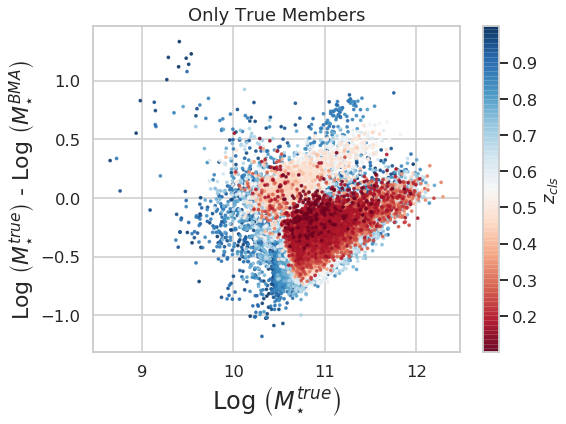

In [414]:
plt.figure(figsize=(8,6))
mass_scatter_residual(mass[mask],mass_t[mask],zcls[mask])
plt.ylabel(r'Log $\left(M_{\star}^{true} \right)$ - Log $\left( M_{\star}^{BMA} \right)$',fontsize=22)
plt.xlabel(r'Log $\left(M_{\star}^{true} \right)$',fontsize=24)

# plt.xlim(9.5,12.5)
# plt.ylim(-1.5,1.5)
plt.title('Only True Members')
plt.tight_layout()
plt.savefig('stellar_mass_residual_mtrue.png')

In [20]:
magi = gal['mag'][:,3]
amag = gal['rabs']
pmem = gal['Pmem']

In [40]:
def get_percentile_curve(x,y,q=95,nbins=12):
    xedges = np.linspace(0.98*np.min(x),1.02*np.max(x),nbins)
    keys, xmean = makeBins(x,xedges)
    ypercentile = [np.percentile(y[idx],q) for idx in keys]
    return xmean, ypercentile
    
def plot_redshift_variable(x,y,q=95,ax=None,weights=None):
    if ax is None: ax = plt.axes()
    cut = remove_nan(y)
    x, y = x[cut], y[cut]
    
    if weights is not None: weights = weights[cut]
        
    xb, yp = get_percentile_curve(x,y,q=q,nbins=31)
    
    ax.hexbin(x,y,gridsize=(25,25),cmap='Reds',C=weights,reduce_C_function=np.sum)
    ax.plot(xb,yp,'k--',label='%ith percentile'%(q))
    ax.set_xlabel(r'$z_{cls}$',fontsize=24)
    ax.legend()

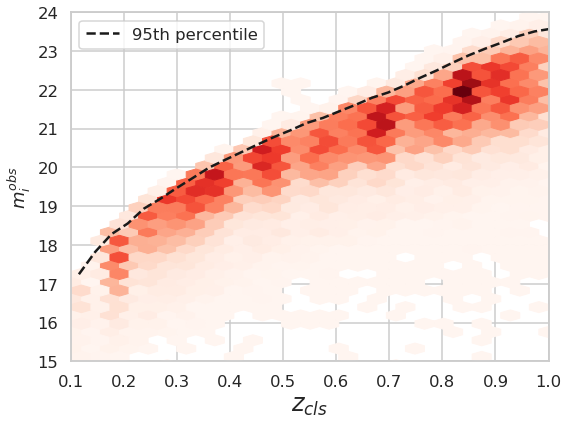

In [22]:
plt.figure(figsize=(8,6))
plot_redshift_variable(zcls,magi,weights=pmem)
plt.xlim(0.1,1.0)
plt.ylim(15,24)
plt.ylabel('$m_{i}^{obs}$')
plt.tight_layout()
plt.savefig('mag_obs_cut.png')

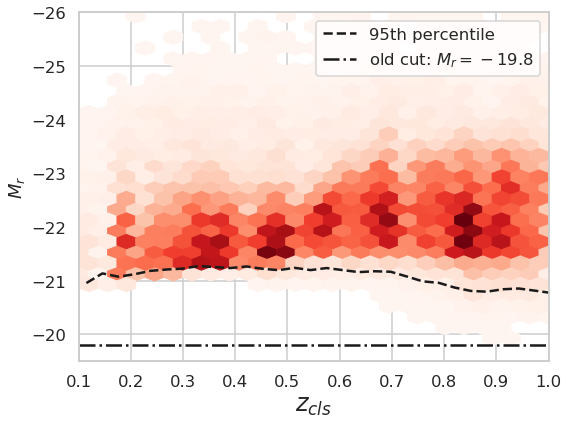

In [23]:
plt.figure(figsize=(8,6))
plot_redshift_variable(zcls,amag,weights=pmem)
plt.axhline(-19.8,color='k',linestyle='-.',label='old cut: $M_{r}=-19.8$')
plt.xlim(0.1,1.0)
plt.ylim(-19.5,-26)
plt.legend()
plt.ylabel('$M_{r}$')
plt.tight_layout()
plt.savefig('amag_cut.png')

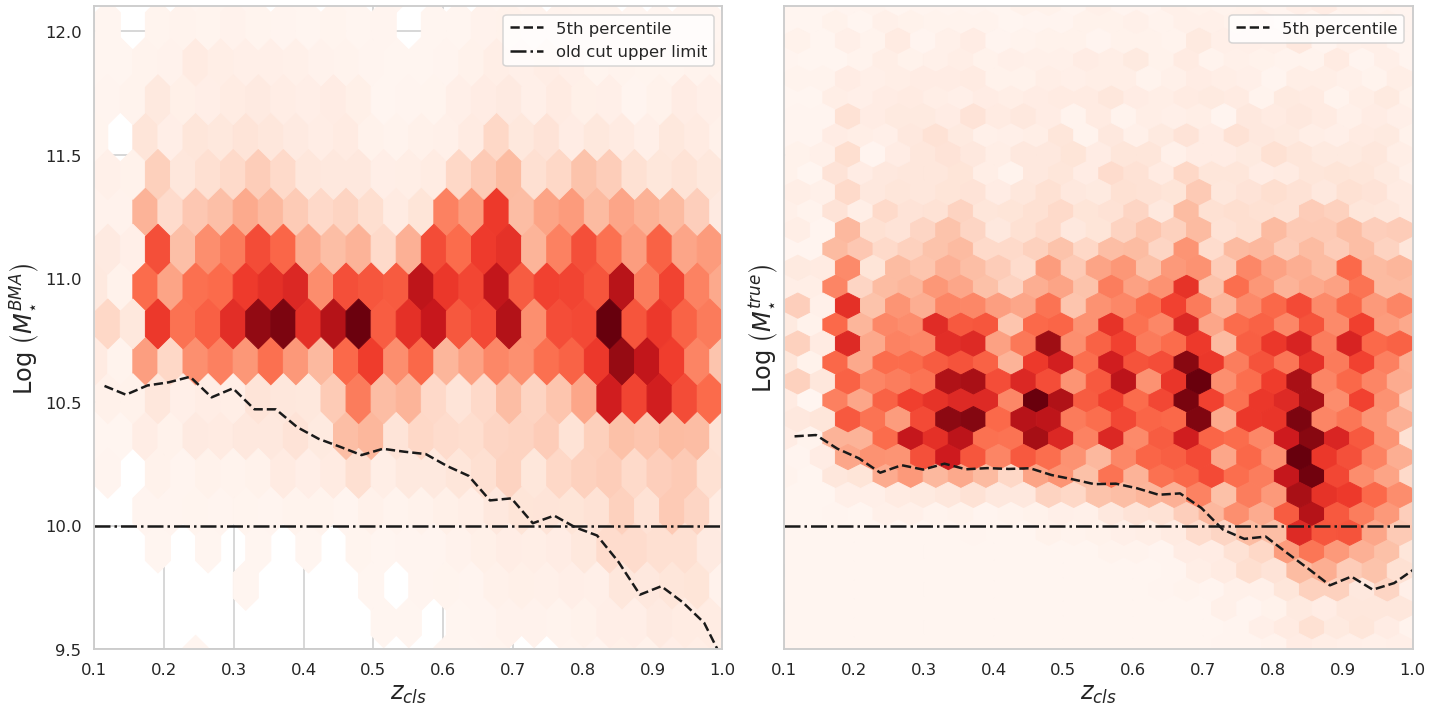

In [24]:
fig, ax = plt.subplots(1,2, sharey='row', sharex='row', figsize=(20,10))
fig.subplots_adjust(wspace=0.15)

plot_redshift_variable(zcls[bads],np.log10(mass[bads]),weights=pmem[bads],q=5,ax=ax[0])
plot_redshift_variable(zcls[mask],np.log10(mass_t[mask]),q=5, ax=ax[1])

ax[0].set_ylabel(r'Log $\left( M_{\star}^{BMA} \right)$',fontsize=24)
ax[1].set_ylabel(r'Log $\left( M_{\star}^{true} \right)$',fontsize=24)

ax[0].set_ylim(9.5,12.1)
ax[0].set_xlim(0.1,1.)

for i in range(2):
    ax[i].axhline(10,color='k',linestyle='-.',label='old cut upper limit')

ax[0].legend()
plt.tight_layout()

plt.savefig('stellar_mass_cut.png')